In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

def plot(ax, i, j, xandylist, xaxis, yaxis, title, xscale='none', yscale='none', xlimit='none', legend='none'):
    linestyles = ['-', '--', '-.', ':']
    if i == 'none' and j == 'none':
        axs = ax
    elif i != 'none' and j == 'none':
        axs = ax[i]
    elif i == 'none' and j != 'none':
        axs = ax[j]
    else:
        axs = ax[i, j]
    for s, xandy in enumerate(xandylist):
        axs.plot(xandy[1], xandy[2], label=xandy[0], linestyle=linestyles[s % len(linestyles)])
    axs.set_xlabel(xaxis)
    if xscale != 'none':
        axs.set_xscale(xscale)
    if yscale != 'none':
        axs.set_yscale(yscale)
    if xlimit != 'none':
        axs.set_xlim(xlimit[0], xlimit[1])
    if legend != 'none':
        axs.legend(loc=legend)
    else:
        axs.legend(loc='best')
    axs.set_ylabel(yaxis)
    axs.set_title(title)

col_addition = ['n', 'm', 's']
title_name = ['Node', 'Edge', 'Solution']

In [7]:
# get data
with open('output_workload/kernelstatistics.csv', 'r') as f:
    df_real_kernel1 = pd.read_csv(f)
with open('output_public/kernelstatistics.csv', 'r') as f:
    df_real_kernel2 = pd.read_csv(f)
with open('output_hidden/kernelstatistics.csv', 'r') as f:
    df_real_kernel3 = pd.read_csv(f)
df_real_kernel = pd.concat([df_real_kernel1, df_real_kernel2, df_real_kernel3], ignore_index=True)
for i in range(len(df_real_kernel.columns)):
    df_real_kernel[df_real_kernel.columns[i]] = np.where(df_real_kernel[df_real_kernel.columns[i]].isna(),
                                                         df_real_kernel[df_real_kernel.columns[i-3]],
                                                         df_real_kernel[df_real_kernel.columns[i]])
with open('output_workload/statistics.csv', 'r') as f:
    df_real_solve1 = pd.read_csv(f)
with open('output_public/statistics.csv', 'r') as f:
    df_real_solve2 = pd.read_csv(f)
with open('output_hidden/statistics.csv', 'r') as f:
    df_real_solve3 = pd.read_csv(f)
df_real_solve = pd.concat([df_real_solve1, df_real_solve2, df_real_solve3], ignore_index=True)
with open('output_workload/statistics_standard_kernel.csv', 'r') as f:
    df_real_solve_standard1 = pd.read_csv(f)
with open('output_public/statistics_standard_kernel.csv', 'r') as f:
    df_real_solve_standard2 = pd.read_csv(f)
with open('output_hidden/statistics_standard_kernel.csv', 'r') as f:
    df_real_solve_standard3 = pd.read_csv(f)
df_real_solve_standard = pd.concat([df_real_solve_standard1, df_real_solve_standard2, df_real_solve_standard3], ignore_index=True)

with open('output_random/kernelstatistics.csv', 'r') as f:
    df_syn_kernel = pd.read_csv(f)
for i in range(len(df_syn_kernel.columns)):
    df_syn_kernel[df_syn_kernel.columns[i]] = np.where(df_syn_kernel[df_syn_kernel.columns[i]].isna(),
                                                         df_syn_kernel[df_syn_kernel.columns[i-3]],
                                                         df_syn_kernel[df_syn_kernel.columns[i]])
with open('output_random/statistics.csv', 'r') as f:
    df_syn_solve = pd.read_csv(f)
with open('output_random/statistics_standard_kernel.csv', 'r') as f:
    df_syn_solve_standard = pd.read_csv(f)

In [8]:
# specific plot function
def plotnmands(cols, names, name_addition, legend='none', legend_cols='none'):
    fig, ax = plt.subplots(3, 2, figsize=(2*4, 3*3))
    fig.suptitle('Kernelization statistics for '+name_addition, fontsize=16)
    df_kernels = [df_real_kernel, df_syn_kernel]
    df_solves = [df_real_solve, df_syn_solve]
    df_solve_standards = [df_real_solve_standard, df_syn_solve_standard]
    datanames = ['real', 'synthetic']
    
    for r in range(2):
        # for decrease nodes and edges
        for type in range(2):
            xandylist = []
            for i, col in enumerate(cols):
                percentages = 100*(df_kernels[r][col_addition[type]]-df_kernels[r][col+col_addition[type]])/df_kernels[r][col_addition[type]]
                percentages = -np.sort(-percentages)
                graphcount = np.array(range(1,len(percentages)+1))
                xandylist.append((names[i], percentages, graphcount))
            plot(ax, type, r,
                 xandylist,
                 'Percentage '+title_name[type]+' decreased',
                 'Number of graphs',
                 title_name[type]+' data on the '+datanames[r]+' dataset',
                 xlimit=(-5, 105),
                 legend=legend)

        # for solution found
        xandylist = []
        df_kernel_adding = df_kernels[r].copy()
        df_kernel_adding['fvs'] = df_solves[r]['fvs']
        df_kernel_adding['fvs'] = np.where(df_kernel_adding['fvs'].isna(), df_solve_standards[r]['fvs'], df_kernel_adding['fvs'])
        df_kernel_adding.dropna(inplace=True)
        for i, col in enumerate(cols):
            df_kernel_adding[col+col_addition[2]] = np.where(df_kernel_adding['fvs'] == 0, 1, df_kernel_adding[col+col_addition[2]])
        df_kernel_adding['fvs'] = np.where(df_kernel_adding['fvs'] == 0, 1, df_kernel_adding['fvs'])
        for i, col in enumerate(cols):
            percentages = 100*df_kernel_adding[col+col_addition[2]]/df_kernel_adding['fvs']
            percentages = -np.sort(-percentages)
            graphcount = np.array(range(1,len(percentages)+1))
            xandylist.append((names[i], percentages, graphcount))
        plot(ax, 2, r,
             xandylist,
             'Percentage of solution found',
             'Number of graphs',
             title_name[2]+' data on the '+datanames[r]+' dataset',
             xlimit=(-5, 105), legend=legend)
    handles, labels = ax[0, 0].get_legend_handles_labels()
    for axs in fig.axes:
        axs.get_legend().remove()
    if legend_cols == 'none':
        legend_cols = len(cols)
    fig.legend(handles, labels, loc='upper center', ncol=legend_cols, bbox_to_anchor=(0.5, 0))
    fig.tight_layout()
    plt.savefig('figures/decrease_'+name_addition.lower().replace(' ','_')+'.pdf', format='pdf', bbox_inches='tight')
    plt.show()

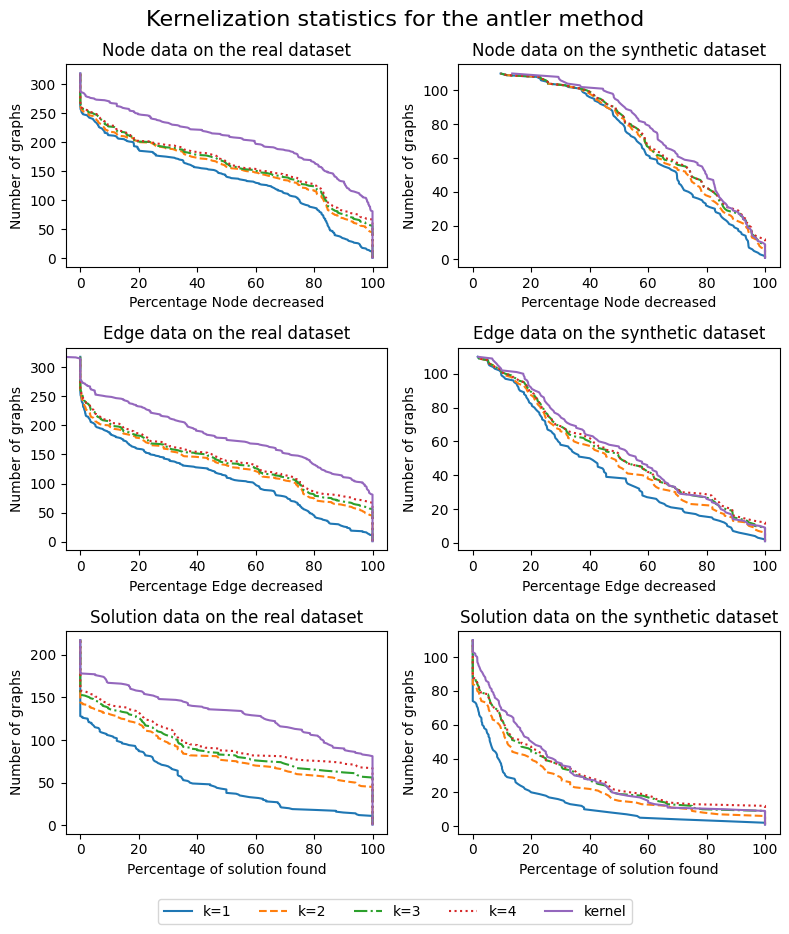

In [67]:
# make plots for antler
cols = ['a1', 'a2', 'a3', 'a4', 'kernel']
names = ['k=1', 'k=2', 'k=3', 'k=4', 'kernel']
plotnmands(cols, names, 'the antler method')

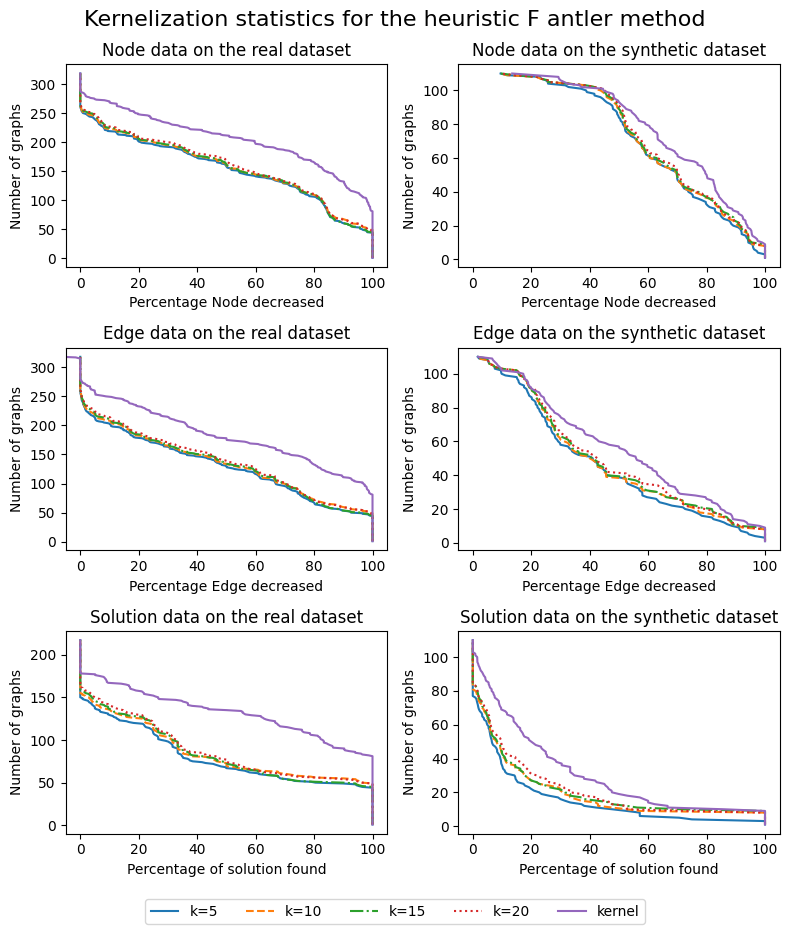

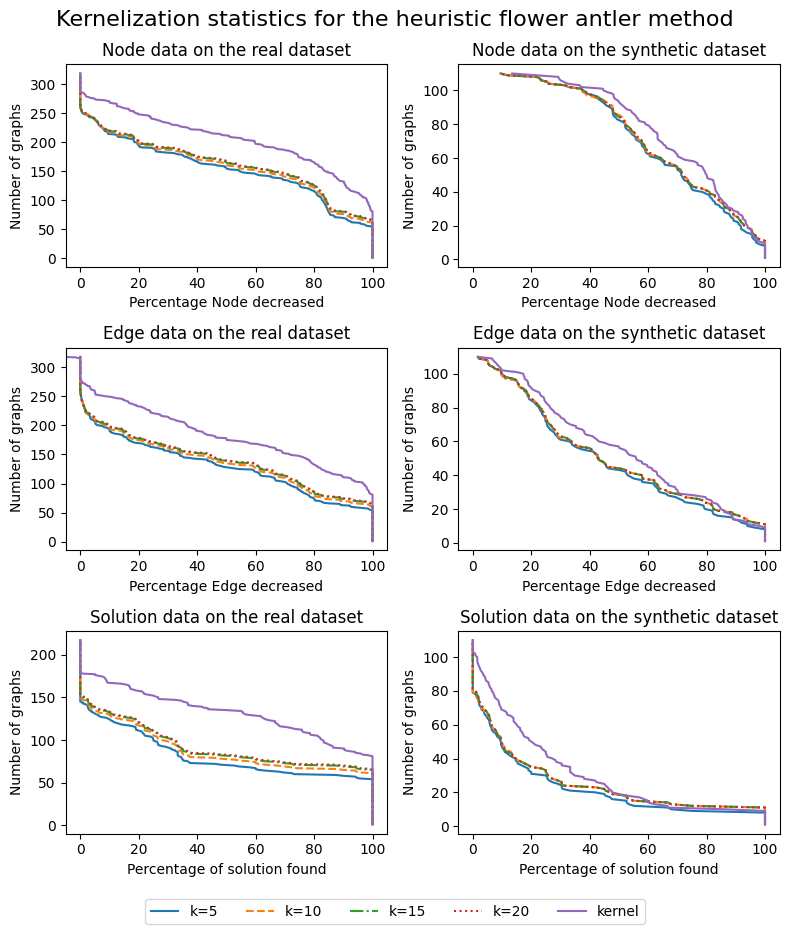

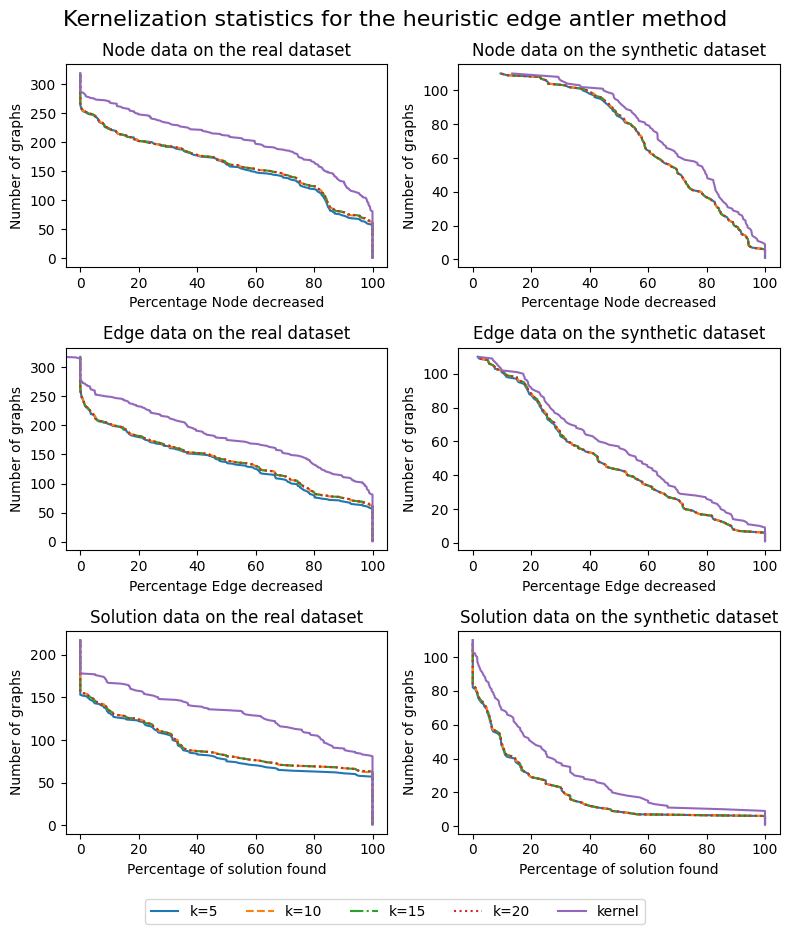

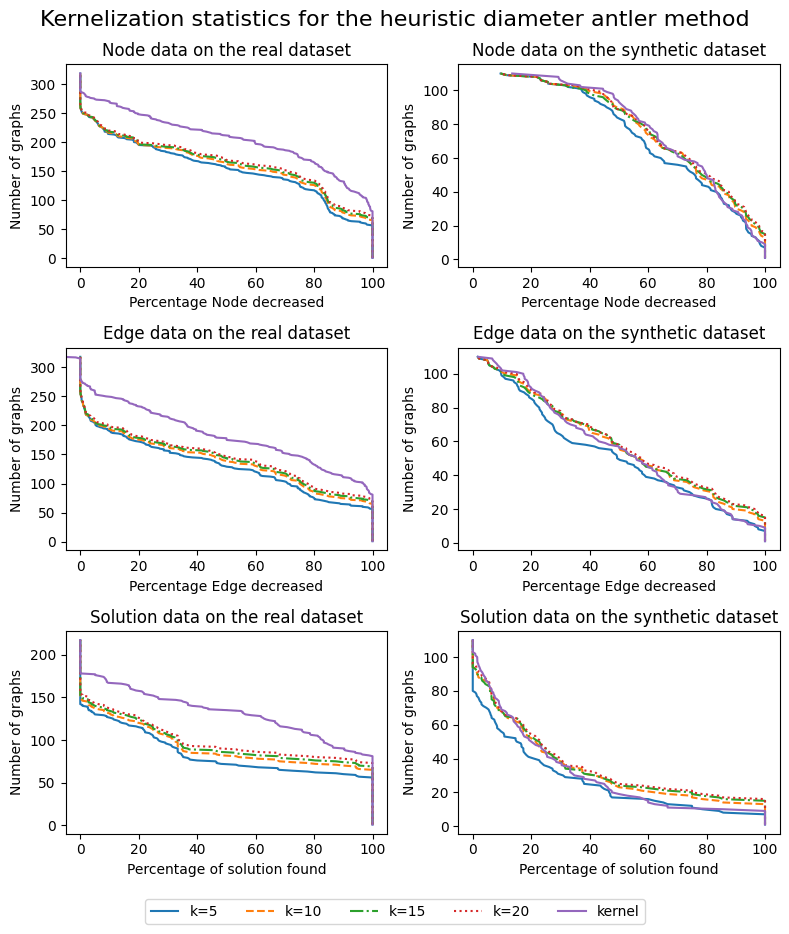

In [68]:
# make plots for heuristic antler
cols = ['ahF5', 'ahF10', 'ahF15', 'ahF20', 'kernel']
names = ['k=5', 'k=10', 'k=15', 'k=20', 'kernel']
plotnmands(cols, names, 'the heuristic F antler method')
cols = ['ahFlower5', 'ahFlower10', 'ahFlower15', 'ahFlower20', 'kernel']
plotnmands(cols, names, 'the heuristic flower antler method')
cols = ['ahEdge5', 'ahEdge10', 'ahEdge15', 'ahEdge20', 'kernel']
plotnmands(cols, names, 'the heuristic edge antler method')
cols = ['ahDiameter5', 'ahDiameter10', 'ahDiameter15', 'ahDiameter20', 'kernel']
plotnmands(cols, names, 'the heuristic diameter antler method')

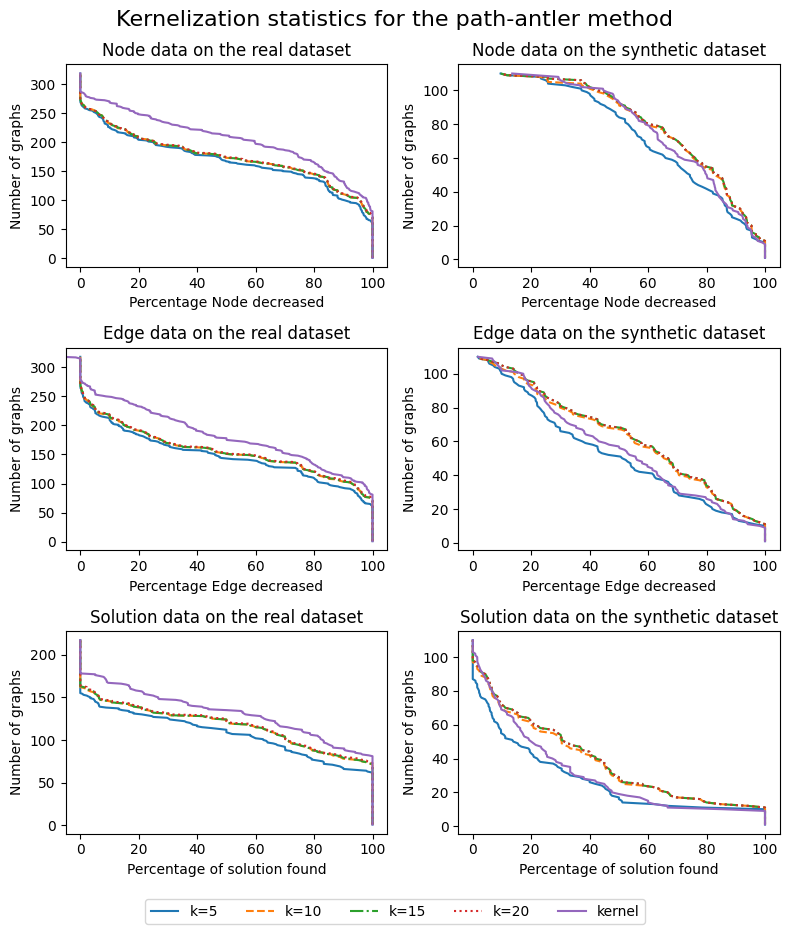

In [69]:
# make plots for path antler
cols = ['p5', 'p10', 'p15', 'p20', 'kernel']
names = ['k=5', 'k=10', 'k=15', 'k=20', 'kernel']
plotnmands(cols, names, 'the path-antler method')

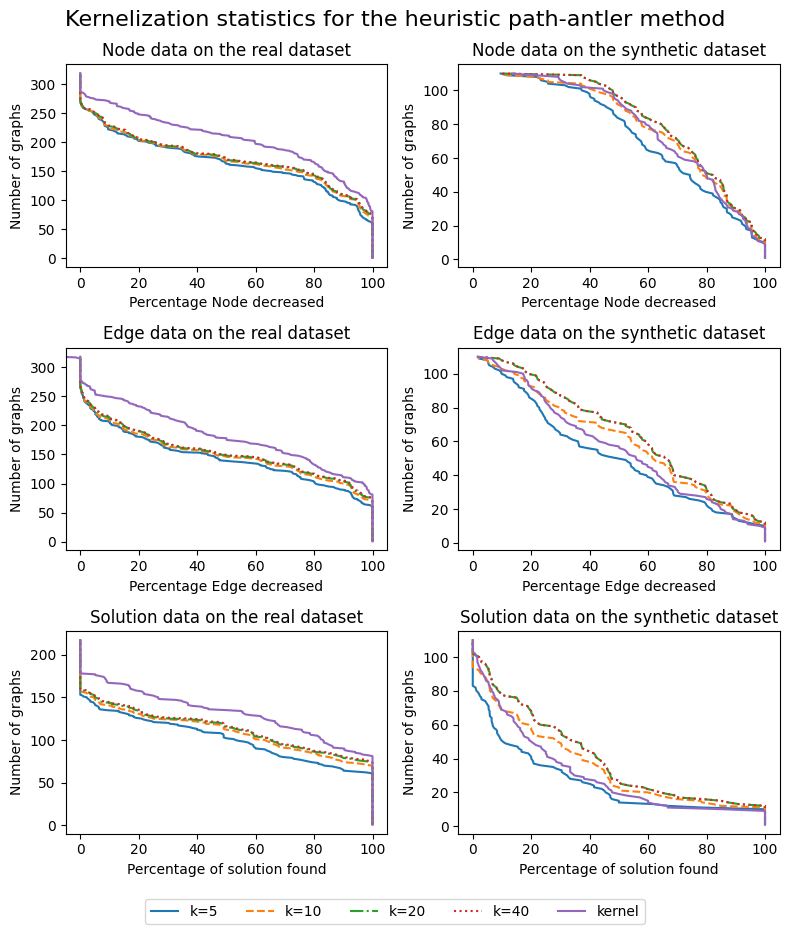

In [70]:
# make plots for heuristic path antler
cols = ['ph5', 'ph10', 'ph20', 'ph40', 'kernel']
names = ['k=5', 'k=10', 'k=20', 'k=40', 'kernel']
plotnmands(cols, names, 'the heuristic path-antler method')

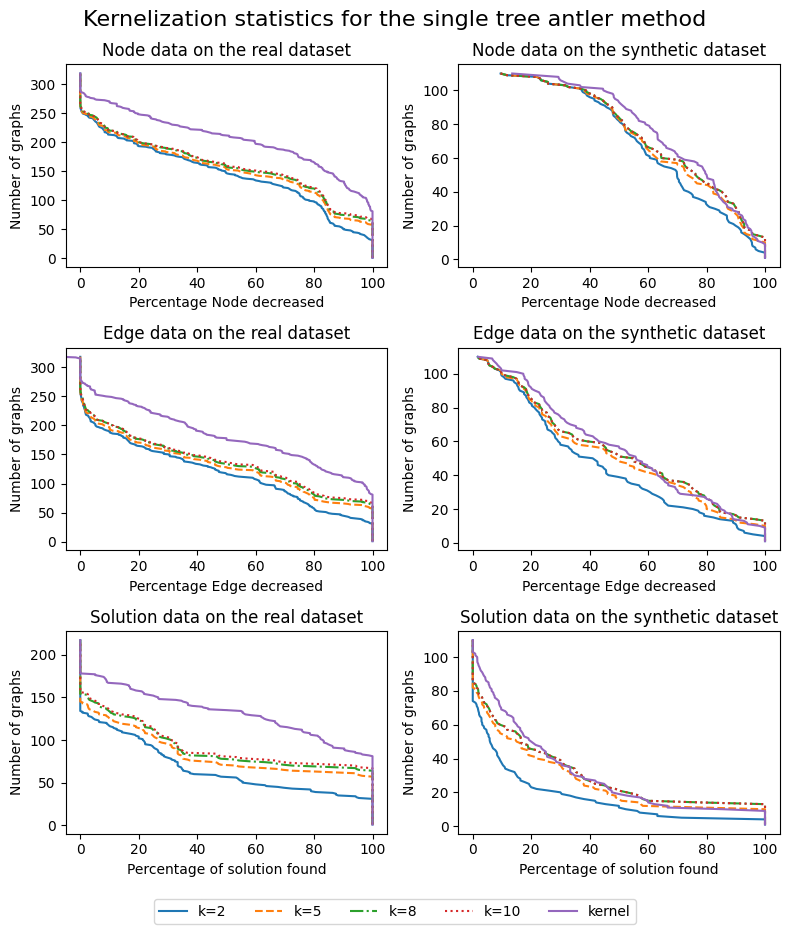

In [71]:
# make plots for single tree antler
cols = ['t2', 't5', 't8', 't10', 'kernel']
names = ['k=2', 'k=5', 'k=8', 'k=10', 'kernel']
plotnmands(cols, names, 'the single tree antler method')

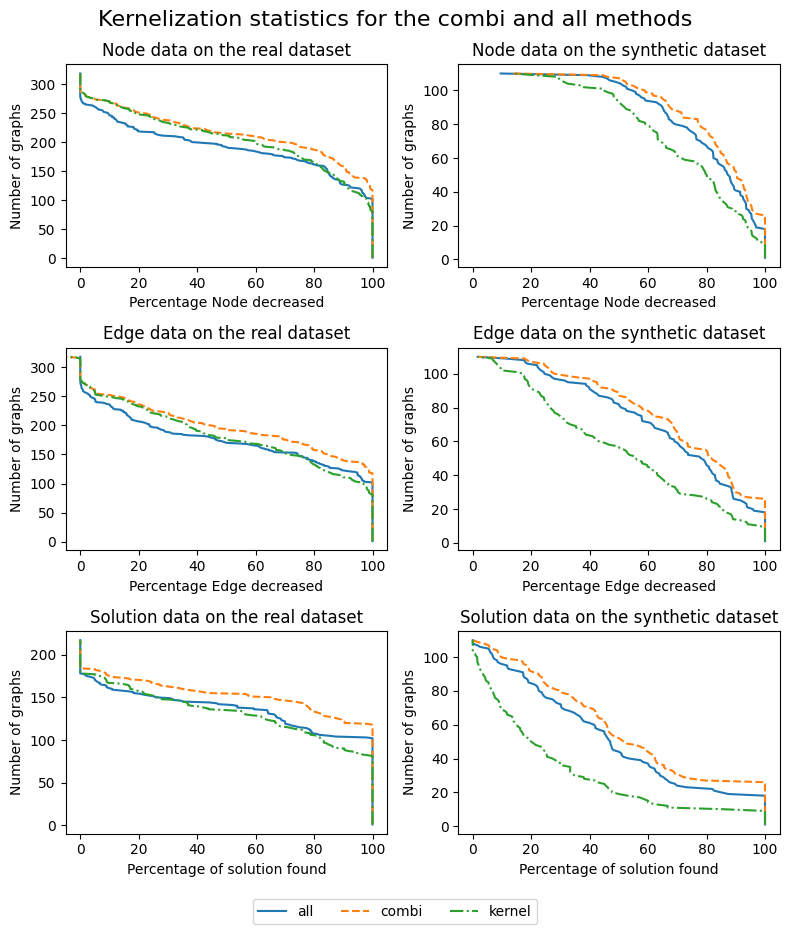

In [72]:
# make plots for all and combi
cols = ['all', 'combi', 'kernel']
names = ['all', 'combi', 'kernel']
plotnmands(cols, names, 'the combi and all methods')

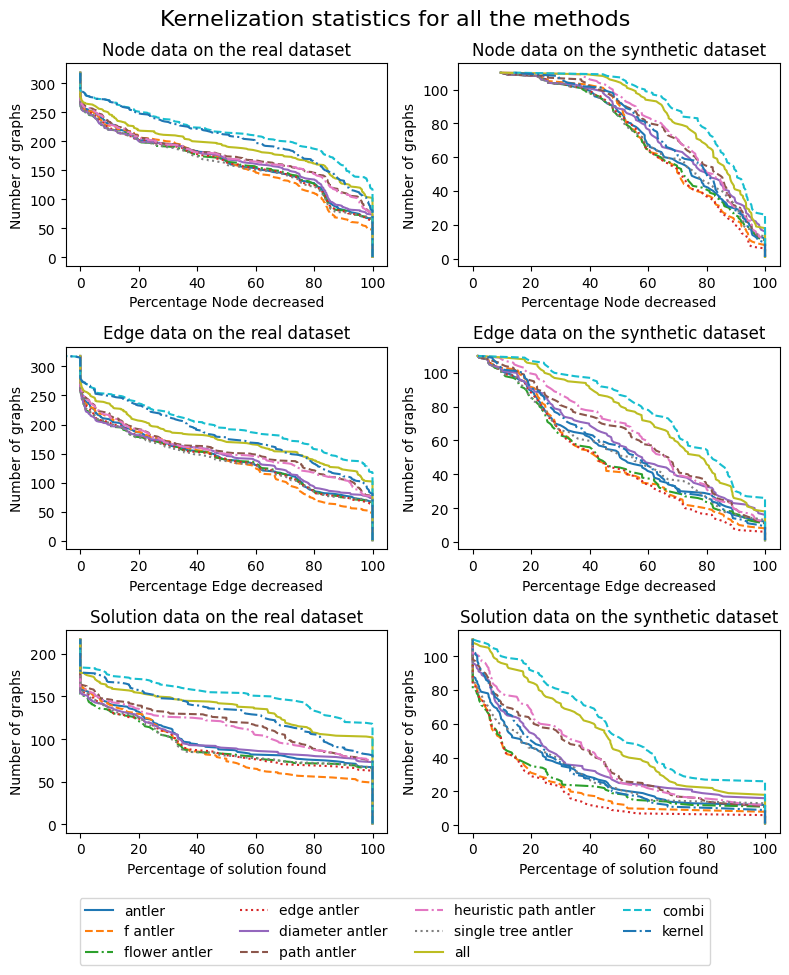

In [73]:
# make plots for all and combi
cols = ['a4', 'ahF20', 'ahFlower20', 'ahEdge20', 'ahDiameter20', 'p20', 'ph40', 't10', 'all', 'combi', 'kernel']
names = ['antler', 'f antler', 'flower antler', 'edge antler', 'diameter antler', 'path antler', 'heuristic path antler', 'single tree antler', 'all', 'combi', 'kernel']
plotnmands(cols, names, 'all the methods', legend_cols=4)

C:\Users\20202991\AppData\Local\Temp\ipykernel_8124\3436580816.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real_solve_only['time'] = np.where(df_real_solve_only['n\''] == 0, df_real_solve_only['kernelTime'], df_real_solve_only['time'])
C:\Users\20202991\AppData\Local\Temp\ipykernel_8124\3436580816.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real_solve_standard_only['time'] = np.where(df_real_solve_standard_only['n\''] == 0, df_real_solve_standard_only['kernelTime'], df_real_solve_stand

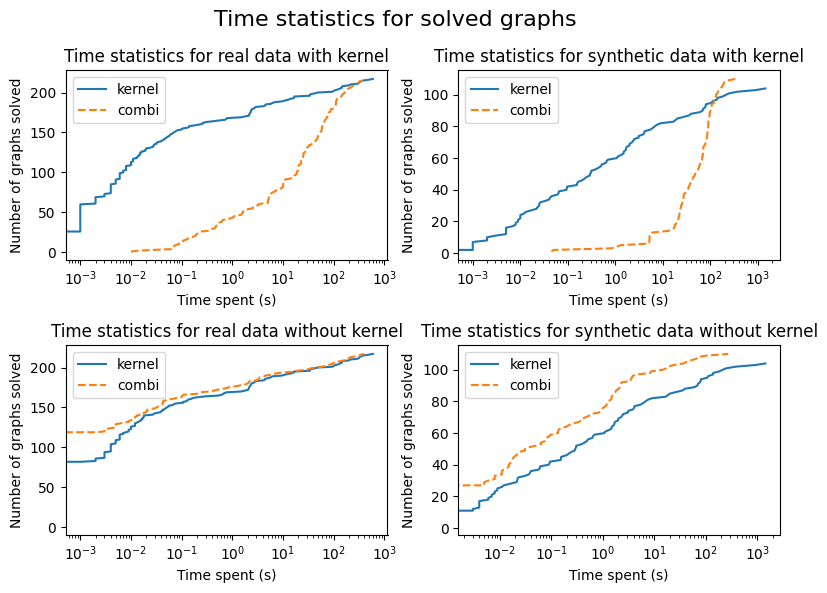

In [78]:
# solve time plots
df_real_solve_only = df_real_solve.dropna()
df_real_solve_only['time'] = np.where(df_real_solve_only['n\''] == 0, df_real_solve_only['kernelTime'], df_real_solve_only['time'])
df_real_solve_standard_only = df_real_solve_standard.dropna()
df_real_solve_standard_only['time'] = np.where(df_real_solve_standard_only['n\''] == 0, df_real_solve_standard_only['kernelTime'], df_real_solve_standard_only['time'])
df_syn_solve_only = df_syn_solve.dropna()
df_syn_solve_only['time'] = np.where(df_syn_solve_only['n\''] == 0, df_syn_solve_only['kernelTime'], df_syn_solve_only['time'])
df_syn_solve_standard_only = df_syn_solve_standard.dropna()
df_syn_solve_standard_only['time'] = np.where(df_syn_solve_standard_only['n\''] == 0, df_syn_solve_standard_only['kernelTime'], df_syn_solve_standard_only['time'])
xandylist_real_with_kernel =    [('kernel',
                                  np.sort(df_real_solve_standard_only['time']/1000),
                                  np.array(range(1,len(df_real_solve_standard_only['time'])+1))),
                                 ('combi',
                                  np.sort(df_real_solve_only['time']/1000),
                                  np.array(range(1,len(df_real_solve_only['time'])+1)))]

xandylist_syn_with_kernel =     [('kernel',
                                  np.sort(df_syn_solve_standard_only['time']/1000),
                                  np.array(range(1,len(df_syn_solve_standard_only['time'])+1))),
                                 ('combi',
                                  np.sort(df_syn_solve_only['time']/1000),
                                  np.array(range(1,len(df_syn_solve_only['time'])+1)))]

xandylist_real_without_kernel = [('kernel',
                                  np.sort((df_real_solve_standard_only['time']-df_real_solve_standard_only['kernelTime'])/1000),
                                  np.array(range(1,len(df_real_solve_standard_only['time'])+1))),
                                 ('combi',
                                  np.sort((df_real_solve_only['time']-df_real_solve_only['kernelTime'])/1000),
                                  np.array(range(1,len(df_real_solve_only['time'])+1)))]

xandylist_syn_without_kernel =  [('kernel',
                                  np.sort((df_syn_solve_standard_only['time']-df_syn_solve_standard_only['kernelTime'])/1000),
                                  np.array(range(1,len(df_syn_solve_standard_only['time'])+1))),
                                 ('combi',
                                  np.sort((df_syn_solve_only['time']-df_syn_solve_only['kernelTime'])/1000),
                                  np.array(range(1,len(df_syn_solve_only['time'])+1)))]

fig, ax = plt.subplots(2, 2, figsize=(2*4, 2*3))

fig.suptitle('Time statistics for solved graphs', fontsize=16)

plot(ax,
     0,
     0,
     xandylist_real_with_kernel,
     'Time spent (s)',
     'Number of graphs solved',
     'Time statistics for real data with kernel',
     xscale='log')

plot(ax,
     0,
     1,
     xandylist_syn_with_kernel,
     'Time spent (s)',
     'Number of graphs solved',
     'Time statistics for synthetic data with kernel',
     xscale='log')

plot(ax,
     1,
     0,
     xandylist_real_without_kernel,
     'Time spent (s)',
     'Number of graphs solved',
     'Time statistics for real data without kernel',
     xscale='log')

plot(ax,
     1,
     1,
     xandylist_syn_without_kernel,
     'Time spent (s)',
     'Number of graphs solved',
     'Time statistics for synthetic data without kernel',
     xscale='log')

plt.tight_layout()
plt.savefig('figures/solve_time_statistics.pdf', format='pdf', bbox_inches='tight')
plt.show()

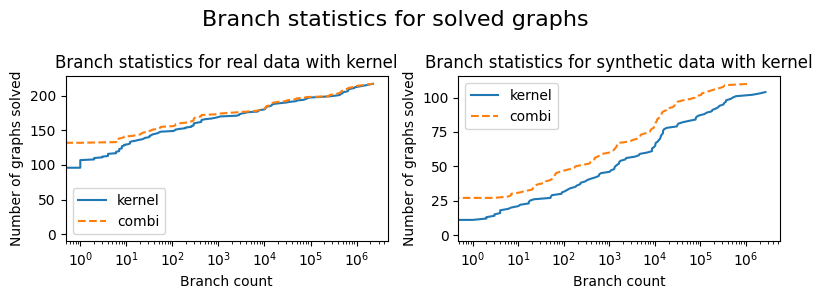

In [97]:
def getbanchcount(filename):
    with open(filename, 'r') as f:
        file_content = f.read()
        file_content.replace(' ', '')
        branch_list = file_content.split('branch:')
        if(len(branch_list) < 2):
            return 0
        branch_string = file_content.split('branch:')[1].split('\n')[0]
        return int(branch_string)
# solve branch count plots
real_branches_kernel = []
real_branches_combi = []
syn_branches_kernel = []
syn_branches_combi = []
for name in df_real_kernel1['graph']:
    if not df_real_solve1[df_real_solve1['graph'] == name]['fvs'].isna().any():
        real_branches_combi.append(getbanchcount('output_workload/'+str(name)+'Branching.txt'))
    if not df_real_solve_standard1[df_real_solve_standard1['graph'] == name]['fvs'].isna().any():
        real_branches_kernel.append(getbanchcount('output_workload/'+str(name)+'Branching_standard_kernel.txt'))
    
for name in df_real_kernel2['graph']:
    name2 = str(name)
    while len(name2) < 3:
        name2 = '0' + name2
    if not df_real_solve2[df_real_solve2['graph'] == name]['fvs'].isna().any():
        real_branches_combi.append(getbanchcount('output_public/'+name2+'Branching.txt'))
    if not df_real_solve_standard2[df_real_solve_standard2['graph'] == name]['fvs'].isna().any():
        real_branches_kernel.append(getbanchcount('output_public/'+name2+'Branching_standard_kernel.txt'))
    
for name in df_real_kernel3['graph']:
    if not df_real_solve3[df_real_solve3['graph'] == name]['fvs'].isna().any():
        real_branches_combi.append(getbanchcount('output_hidden/'+str(name)+'Branching.txt'))
    if not df_real_solve_standard3[df_real_solve_standard3['graph'] == name]['fvs'].isna().any():
        real_branches_kernel.append(getbanchcount('output_hidden/'+str(name)+'Branching_standard_kernel.txt'))
    
for name in df_syn_kernel['graph']:
    if not df_syn_solve[df_syn_solve['graph'] == name]['fvs'].isna().any():
        syn_branches_combi.append(getbanchcount('output_random/'+str(name)+'Branching.txt'))
    if not df_syn_solve_standard[df_syn_solve_standard['graph'] == name]['fvs'].isna().any():
        syn_branches_kernel.append(getbanchcount('output_random/'+str(name)+'Branching_standard_kernel.txt'))

xandylist_real = [('kernel',
                   np.sort(np.array(real_branches_kernel)),
                   np.array(range(1,len(real_branches_kernel)+1))),
                  ('combi',
                   np.sort(np.array(real_branches_combi)),
                   np.array(range(1,len(real_branches_combi)+1)))]

xandylist_syn =  [('kernel',
                   np.sort(np.array(syn_branches_kernel)),
                   np.array(range(1,len(syn_branches_kernel)+1))),
                  ('combi',
                   np.sort(np.array(syn_branches_combi)),
                   np.array(range(1,len(syn_branches_combi)+1)))]

fig, ax = plt.subplots(1, 2, figsize=(2*4, 1*3))

fig.suptitle('Branch statistics for solved graphs', fontsize=16)

plot(ax,
     'none',
     0,
     xandylist_real,
     'Branch count',
     'Number of graphs solved',
     'Branch statistics for real data with kernel',
     xscale='log')

plot(ax,
     'none',
     1,
     xandylist_syn,
     'Branch count',
     'Number of graphs solved',
     'Branch statistics for synthetic data with kernel',
     xscale='log')

plt.tight_layout()
plt.savefig('figures/solve_branch_statistics.pdf', format='pdf', bbox_inches='tight')
plt.show()

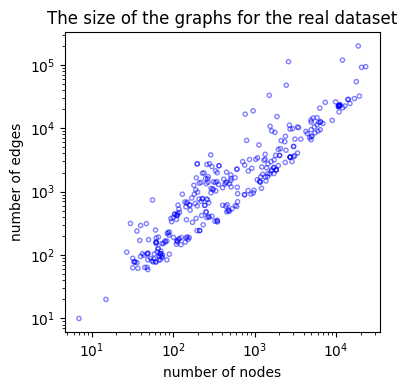

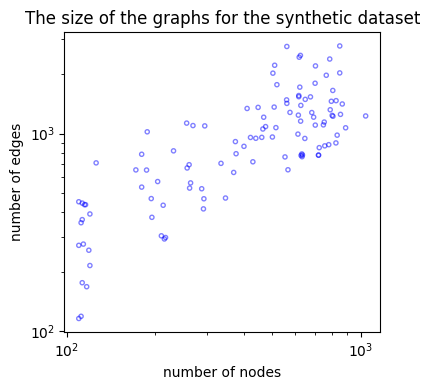

In [30]:
# data summery

def summery(data_x, data_y, title_add):
    fig, ax = plt.subplots(1, 1, figsize=(4, 4))
    ax.scatter(data_x, data_y, marker='.', facecolors='none', edgecolors='blue', alpha=0.5)
    #ax.plot(np.array([min(min(data_x), min(data_y)), max(max(data_x), max(data_y))]),
    #        np.array([min(min(data_x), min(data_y)), max(max(data_x), max(data_y))]), color='red', linestyle='-', linewidth=0.5)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_title('The size of the graphs for the '+title_add+' dataset')
    ax.set_ylabel('number of edges')
    ax.set_xlabel('number of nodes')
    fig.tight_layout()
    plt.savefig('figures/statistics_'+title_add+'.pdf', format='pdf')
    plt.show()

summery(df_real_solve['n'], df_real_solve['m'], 'real')
summery(df_syn_solve['n'], df_syn_solve['m'], 'synthetic')

In [ ]:
#count non nan solutions
print('Real dataset non nan solutions: ', len(df_real_solve[df_real_solve['fvs'].notna()]))
print('Synthetic dataset non nan solutions: ', len(df_syn_solve[df_syn_solve['fvs'].notna()]))
print('Real dataset non nan solutions standard kernel: ', len(df_real_solve_standard[df_real_solve_standard['fvs'].notna()]))
print('Synthetic dataset non nan solutions standard kernel: ', len(df_syn_solve_standard[df_syn_solve_standard['fvs'].notna()]))

Real dataset non nan solutions:  217
Synthetic dataset non nan solutions:  110
Real dataset non nan solutions standard kernel:  217
Synthetic dataset non nan solutions standard kernel:  104


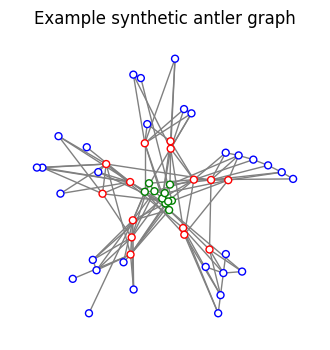

In [ ]:
# Graph visualization
import networkx as nx

def draw_graph(edges, group_sizes, colors, title):
    while True:
        G = nx.Graph()
        G.add_edges_from(edges)
        color_map = []
        pos = {}
        for i in range(1, len(group_sizes)):
            group_sizes[i] = group_sizes[i-1]+group_sizes[i]
        groups = []
        for i in range(len(group_sizes)):
            groups.append([])
        for node in G.nodes():
            for j, group_size in enumerate(group_sizes):
                if node < group_size:
                    groups[j].append(node)
                    break
        for node in G.nodes():
            for i, group in enumerate(groups):
                if node in group:
                    color_map.append(colors[i])
                    break
        for i, group in enumerate(groups):
            subgraph = G.subgraph(group)
            sub_pos = nx.spring_layout(subgraph, scale=1.0, k=0.5)
            adding = np.array([0, 0])
            if i != len(groups) - 1:
                if i % 2 == 0:
                    adding = np.array([math.sin(math.floor(i/2)/(len(groups)-1)*4*math.pi)*6, math.cos(math.floor(i/2)/(len(groups)-1)*4*math.pi)*6])
                else:
                    adding = np.array([math.sin(math.floor(i/2)/(len(groups)-1)*4*math.pi)*3, math.cos(math.floor(i/2)/(len(groups)-1)*4*math.pi)*3])
            for node in sub_pos:
                if i != len(groups) - 1 and i % 2 == 0:
                    sub_pos[node] *= 2
                pos[node] = sub_pos[node] + adding
        to_break = True
        for node in G.nodes():
            for node2 in G.nodes():
                if node != node2 and ((pos[node][0]-pos[node2][0])**2+(pos[node][1]-pos[node2][1])**2)**0.5 < 0.15:
                    to_break = False
                    break
        if to_break:
            break
    fig, ax = plt.subplots(1, 1, figsize=(4, 4))
    nx.draw(G, pos, ax=ax, with_labels=False, node_size=25, node_color='white', edgecolors=color_map, font_size=10, font_color='black', edge_color='gray')
    ax.set_title(title)
    plt.savefig('figures/example_graph4.pdf', format='pdf')
    plt.show()
    
def get_graph_from_file(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    edges = []
    for line in lines:
        if line.strip() and not line.startswith('#'):
            parts = line.strip().split()
            if len(parts) == 2:
                u, v = int(parts[0]), int(parts[1])
                edges.append((u, v))
    return edges

# Example usage
edges_real = get_graph_from_file('output_test/visual2.graph')
draw_graph(edges_real, [6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 10], ['blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'green'], 'Example synthetic path-antler graph')